# ROC AUC

Receiver Operating Characteristic Area Under Curve

- Model => probability => prediction 0/1
- Probability threshold = 0.5
- Loop threshold 0 - 1, setiap perubahan loop ada prediksi baru
- Setiap prediksi  => confusion matrix
- Confusion matrix => TP, TN, FP, FN => TP Rate(Recall+) & FP Rate
- Buat plot FPR & TPR, hasilnya berupa ROC Curve => dicari luas AUC-nya
- Nanti didapatkan nilai 0 - 1, dengan nilai mendekati 1, semakin bagus hasilnya.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
data = {
    'x' : np.arange(1, 11),
    'y' : np.hstack((np.zeros(5), np.ones(5)))
}
df = pd.DataFrame(data)
# df

In [3]:
model = LogisticRegression(solver='lbfgs')
model.fit(df[['x']], df['y'])
df['proba'] = model.predict_proba(df[['x']])[:, 1]
df

,x,y,proba
0,1,0.0,0.004787
1,2,0.0,0.015504
2,3,0.0,0.049032
3,4,0.0,0.144426
4,5,0.0,0.355947
5,6,1.0,0.644053
6,7,1.0,0.855574
7,8,1.0,0.950968
8,9,1.0,0.984496
9,10,1.0,0.995213


In [4]:
model.predict(df[['x']])

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [5]:
# Variasi threshold
# df['y"0.1'] = df['proba'].apply(lambda x: 1 if x>0.1 else 0)
# df['y"0.2'] = df['proba'].apply(lambda x: 1 if x>0.2 else 0)
# df['y"0.3'] = df['proba'].apply(lambda x: 1 if x>0.3 else 0)
# df

In [6]:
# Atau bisa dilooping untuk mempermudah 0.1 - 0.9 untuk variasi threshold
for i in np.arange(0.1, 1, 0.1):
    df[f'y"{round(i,2)}'] = df['proba'].apply(lambda x: 1 if (x>i) else 0)

df

,x,y,proba,"y""0.1","y""0.2","y""0.3","y""0.4","y""0.5","y""0.6","y""0.7","y""0.8","y""0.9"
0,1,0.0,0.004787,0,0,0,0,0,0,0,0,0
1,2,0.0,0.015504,0,0,0,0,0,0,0,0,0
2,3,0.0,0.049032,0,0,0,0,0,0,0,0,0
3,4,0.0,0.144426,1,0,0,0,0,0,0,0,0
4,5,0.0,0.355947,1,1,1,0,0,0,0,0,0
5,6,1.0,0.644053,1,1,1,1,1,1,0,0,0
6,7,1.0,0.855574,1,1,1,1,1,1,1,1,0
7,8,1.0,0.950968,1,1,1,1,1,1,1,1,1
8,9,1.0,0.984496,1,1,1,1,1,1,1,1,1
9,10,1.0,0.995213,1,1,1,1,1,1,1,1,1


In [7]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(df['y'], df['y"0.1']).ravel()

print(tn, fp, fn, tp)
print('FPR =', fp / (fp + tn))
print('TPR =', tp / (tp + fn))

3 2 0 5
FPR = 0.4
TPR = 1.0


In [8]:
ROC = []
for i in np.arange(0.1, 1, 0.1):
    tn,fp,fn,tp = confusion_matrix(
        df['y'], df[f'y"{round(i,2)}']
    ).ravel()
    FPR = fp / (fp + tn)
    TPR = tp / (tp + fn)
    ROC.append([FPR, TPR])
ROC

[[0.4, 1.0],
 [0.2, 1.0],
 [0.2, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 0.8],
 [0.0, 0.8],
 [0.0, 0.6]]

Text(0.5, 1.0, 'ROC Curve')

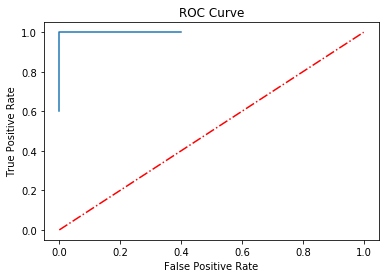

In [9]:
ROC = np.array(ROC)

plt.plot(ROC[:, 0], ROC[:,1])
plt.plot([0, 1], [0, 1], 'r-.')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

### -- Menggunakan Sklearn --

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

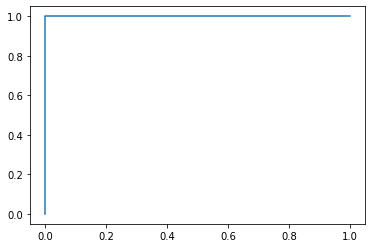

In [13]:
fpr, tpr, t = roc_curve(
    df['y'], model.predict_proba(df[['x']])[:, 1]
)
plt.plot(fpr, tpr)

In [15]:
print('Nilai AUC : ', roc_auc_score(df['y'], model.predict(df[['x']])))

Nilai AUC :  1.0
